## Examples of document analysis in natural language processing using Python - Emre Kurt

**In this notebook, I will be exploring several techniques in NLP using a hypothesis-driven approach. Namely, I'll be showing how to:**
+ Transform documents into numbers
+ Characterize documents
+ Compare documents 
+ Perform sentiment analysis

**I'm going to use three snippets from articles by Fox News, The Hill, and The New York Times reporting on Bernie Sanders' win in Nevada during the 2020 primaries.**

In [1]:
import os
from bs4 import BeautifulSoup
data = []
for source in os.listdir('./'):
  if '.txt' in source:
    with open('./' + source, 'rb') as file:
          print(source)
          text = file.read()
          
          # clean html
          soup = BeautifulSoup(text)
          clean_text = soup.get_text()
          clean_text = clean_text.replace(u'\xa0', u' ')
          clean_text = clean_text.replace(u'\n', u' ')
          data.append([source.replace('.txt', ''), clean_text])

corpus = [article for source, article in data]
sources = [source for source, article in data]


nyt.txt
fox.txt
hill.txt


**We can represent the corpus as a Document-Term Matrix (DTM), which plots the articles on the rows and their words on the columns, and counts their occurences.**

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

cv = CountVectorizer(stop_words = 'english', min_df = 0.2, ngram_range = (1,1))
corpus_cv = cv.fit_transform(corpus)
feats = cv.get_feature_names()
corpus_array = corpus_cv.toarray()
df = pd.DataFrame(corpus_array, columns = feats, index = sources)
df

,000,10,100,14,15,17,19,20,200,2016,...,wonder,work,workers,worried,worrying,worst,year,years,york,young
nyt,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,1,1,1,0
fox,0,1,0,0,1,1,1,0,1,1,...,0,0,0,2,1,1,0,0,1,0
hill,2,2,1,1,2,0,1,1,0,3,...,0,1,0,0,0,0,1,0,1,1


**If we want certain phrases to be counted as one word (e.g. "air conditioner"), we can use the concept of an n-gram, where a unigram is a one word phrase. We can edit our DTM based on our preferences. The following DTM shows off bigrams.**

In [4]:
cv2 = CountVectorizer(stop_words = 'english', min_df = 0.2, ngram_range = (1,2))
corpus_cv2 = cv2.fit_transform(corpus)
feats2 = cv2.get_feature_names()
corpus_array2 = corpus_cv2.toarray()
df2 = pd.DataFrame(corpus_array2, columns = feats2, index = sources)
df2

,000,000 participating,000 people,10,10 percent,100,100 percent,14,14 super,15,...,year,year old,year saturday,years,years ago,york,york city,york reeling,young,young people
nyt,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,1,1,0,1,0,0
fox,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
hill,2,1,1,2,2,1,1,1,1,2,...,1,0,1,0,0,1,1,0,1,1


In [5]:
df['new york city'] = df2['york city']
df

,000,10,100,14,15,17,19,20,200,2016,...,work,workers,worried,worrying,worst,year,years,york,young,new york city
nyt,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,1,0,0
fox,0,1,0,0,1,1,1,0,1,1,...,0,0,2,1,1,0,0,1,0,1
hill,2,2,1,1,2,0,1,1,0,3,...,1,0,0,0,0,1,0,1,1,1


**I added 'new york city', getting the number of times it occurs from the bigram matrix, as 'york city' can't refer to anything but NYC.**

**Instead of word counts, we can let our DTM show the TF-IDF score of each word, where the TF-IDF score for a word increases as the word is used more frequently in individual documents (but also decreases as the word is used more across all documents in the corpus).**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(stop_words = 'english', min_df = 1)
corpus_tf = tfidf.fit_transform(corpus)
feats = tfidf.get_feature_names()

corpus_array = corpus_tf.toarray()

df3 = pd.DataFrame(corpus_array, columns = feats, index = sources)
df3

,000,10,100,14,15,17,19,20,200,2016,...,wonder,work,workers,worried,worrying,worst,year,years,york,young
nyt,0.000000,0.000000,0.000000,0.000000,0.008983,0.000000,0.000000,0.000000,0.000000,0.008983,...,0.01521,0.000000,0.01521,0.000000,0.000000,0.000000,0.011567,0.01521,0.008983,0.000000
fox,0.000000,0.018315,0.000000,0.000000,0.014223,0.024082,0.018315,0.000000,0.024082,0.014223,...,0.00000,0.000000,0.00000,0.048164,0.024082,0.024082,0.000000,0.00000,0.014223,0.000000
hill,0.060814,0.046251,0.030407,0.030407,0.035918,0.000000,0.023125,0.030407,0.000000,0.053877,...,0.00000,0.030407,0.00000,0.000000,0.000000,0.000000,0.023125,0.00000,0.017959,0.030407


**Next, we can go into document similarity. First, I used cosine similarity.**

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
pairwise_sim = cosine_similarity(corpus_cv)
pd.DataFrame(pairwise_sim, columns = sources, index = sources)

,nyt,fox,hill
nyt,1.000000,0.568739,0.587302
fox,0.568739,1.000000,0.720324
hill,0.587302,0.720324,1.000000


**We can also use PCA visualization (dimension reduction).**

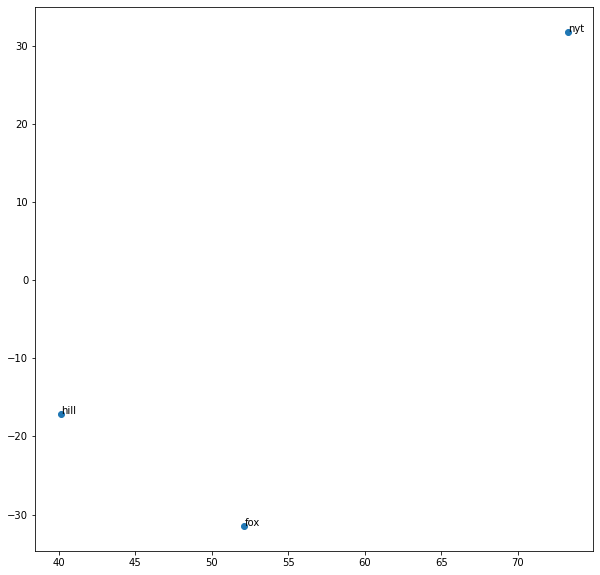

In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=2)
X_r = svd.fit_transform(corpus_cv)

xs = [xs for xs, ys in X_r]
ys = [ys for xs, ys in X_r]

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(xs, ys)

for i, txt in enumerate(sources):
    ax.annotate(txt, (xs[i], ys[i]))

**Next, we can measure the lexical diversity of each document. That is, the inverse of how repetitive a document is. We do this using the type-token ratio (TTR), where we divide unique words over the total number of words.** 

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
tokenizer = nltk.tokenize.WhitespaceTokenizer()
nyt = corpus[0]
fox = corpus[1]
hill = corpus[2]
def TTR(tokenized_document):
    total_types = Counter(tokenized_document)
    total_tokens = len(tokenized_document)
    TTR = len(total_types) / total_tokens 
    
    return TTR
    
print(f'The Hill TTR: {TTR(tokenizer.tokenize(hill))}')
print(f'Fox TTR: {TTR(tokenizer.tokenize(fox))}')
print(f'NYT TTR: {TTR(tokenizer.tokenize(nyt))}')

The Hill TTR: 0.5132662397072278
Fox TTR: 0.466794380587484
NYT TTR: 0.43856837606837606


In [17]:
#Controlling for document length:
def R(tokenized_document):
    total_types = Counter(tokenized_document)
    total_tokens = len(tokenized_document)
    R = len(total_types) / np.sqrt(total_tokens) 
    
    return R

print(f'The Hill TTR: {R(tokenizer.tokenize(hill))}')
print(f'Fox TTR: {R(tokenizer.tokenize(fox))}')
print(f'NYT TTR: {R(tokenizer.tokenize(nyt))}')

The Hill TTR: 16.968864442730244
Fox TTR: 18.47232232853928
NYT TTR: 18.975369212538045


**Finally, we can do some rudimentary sentiment analysis. We see how positive or negative the documents affective state is. We can use this information to know the authors emotions/bias/tendency toward certain actions.**

In [18]:
from afinn import Afinn
af = Afinn()
sentimentFox = af.score(fox)
sentimentNYT = af.score(nyt)
sentimentHill = af.score(hill)
print("Sentiment scores (higher is more positive):")
print("Hill Sentiment: ",sentimentHill)
print("Fox Sentiment: ",sentimentFox)
print("NYT Sentiment: ",sentimentNYT)

Sentiment scores (higher is more positive):
Hill Sentiment:  24.0
Fox Sentiment:  64.0
NYT Sentiment:  80.0
